In [1]:
# Import libraries

import nibabel as nii
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
# layers

image1_l = nii.load(r'C:\Users\User\Documents\Raíssa\Curso Monte Carlo\pymcx-master\pymcx\F-904-3-LAYERS-s1.nii')
image2_l = nii.load(r'C:\Users\User\Documents\Raíssa\Curso Monte Carlo\pymcx-master\pymcx\F-904-3-LAYERS-s2.nii')
image3_l = nii.load(r'C:\Users\User\Documents\Raíssa\Curso Monte Carlo\pymcx-master\pymcx\F-904-3-LAYERS-s3.nii')
image4_l = nii.load(r'C:\Users\User\Documents\Raíssa\Curso Monte Carlo\pymcx-master\pymcx\F-904-3-LAYERS-s4.nii')
image5_l = nii.load(r'C:\Users\User\Documents\Raíssa\Curso Monte Carlo\pymcx-master\pymcx\F-904-3-LAYERS-s5.nii')

data1_l = image1_l.get_fdata()
data1_l = np.squeeze(data1_l)
data2_l = image2_l.get_fdata()
data2_l = np.squeeze(data2_l)
data3_l = image3_l.get_fdata()
data3_l = np.squeeze(data3_l)
data4_l = image4_l.get_fdata()
data4_l = np.squeeze(data4_l)
data5_l = image5_l.get_fdata()
data5_l = np.squeeze(data5_l)


In [3]:
# Suavização Longitudinal

# Criação da Matriz em branco
data_l_s = np.zeros((50,100))

# Loop de suavização do conjunto de dados
for i in range(50):
    for j in range(100):
        data_l_s[i][j]=(data1_l[i][j][50]+data2_l[i][j][50]+data3_l[i][j][50]+data4_l[i][j][50]+data5_l[i][j][50])/5

In [4]:
# Suavização Transversal Músculo

# Criação da Matriz em branco
data_l_s_tm = np.zeros((100,100))

# Loop de suavização do conjunto de dados
for i in range(100):
    for j in range(100):
        data_l_s_tm[i][j]=(data1_l[19][i][j]+data2_l[19][i][j]+data3_l[19][i][j]+data4_l[19][i][j]+data5_l[19][i][j])/5
        
# Suavização Transversal Gordura

# Criação da Matriz em branco
data_l_s_tg = np.zeros((100,100))

# Loop de suavização do conjunto de dados
for i in range(100):
    for j in range(100):
        data_l_s_tg[i][j]=(data1_l[34][i][j]+data2_l[34][i][j]+data3_l[34][i][j]+data4_l[34][i][j]+data5_l[34][i][j])/5

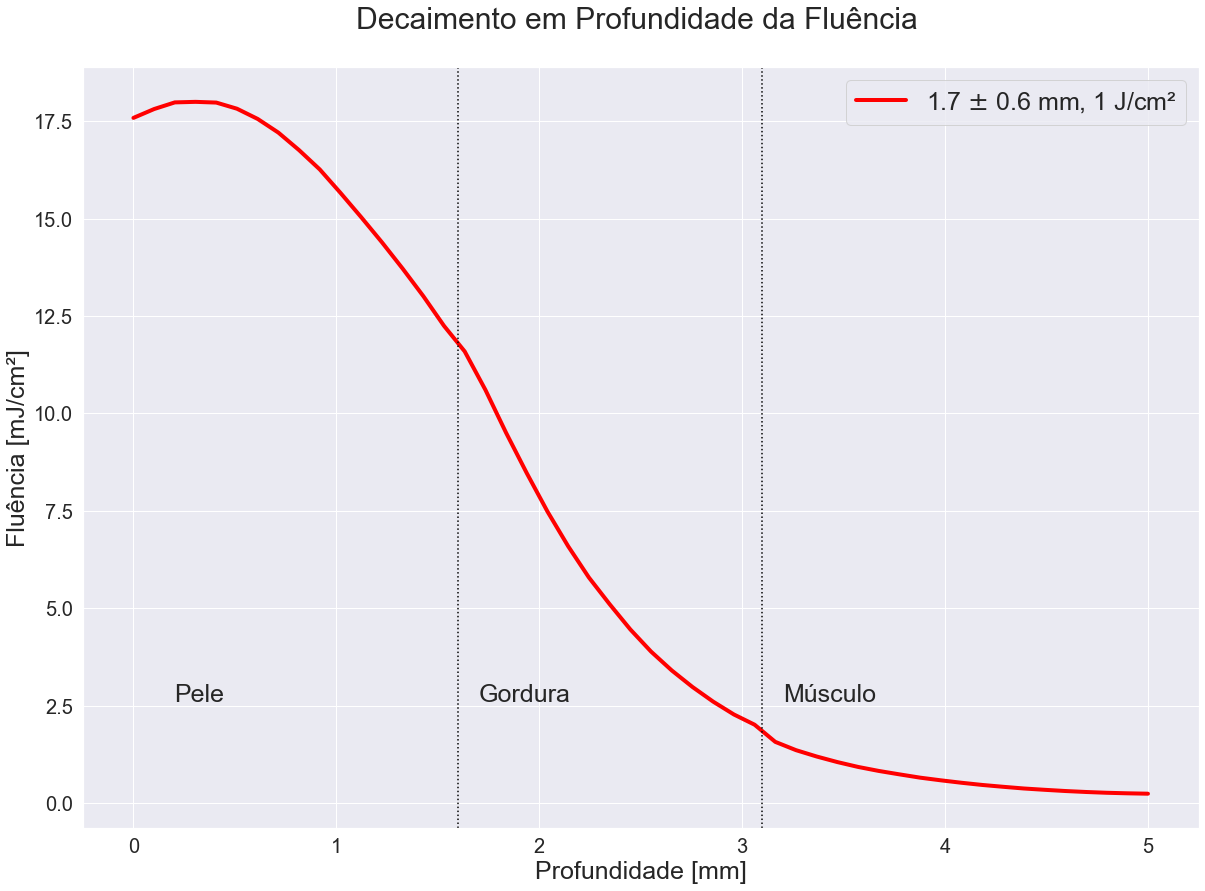

In [26]:
# Decaimento em profundidade

Y = np.linspace(5,0,50)

sns.set_theme()
fig,axs = plt.subplots(1, figsize = (20, 14))
plt.suptitle('Decaimento em Profundidade da Fluência', y=0.94, x=0.51, fontsize=30)
plt.subplots_adjust(hspace = 0.7)   # Pushing up the title

axs.plot(Y, 1000*data_l_s[:,50]*0.090792, color = "red", label = '1.7 $\pm$ 0.6 mm, 1 J/cm²',linewidth=4.0)
plt.text(0.2, 2.6, 'Pele',fontsize=25)
plt.axvline(x = 1.6, color = 'black', linestyle = ':',linewidth=1.5)
plt.text(1.7, 2.6, 'Gordura',fontsize=25)
plt.axvline(x = 3.1, color = 'black', linestyle = ':',linewidth=1.5)
plt.text(3.2, 2.6, 'Músculo',fontsize=25)
plt.legend(loc=1, prop={'size': 25})


axs.set_ylabel('Fluência [mJ/cm²]', fontsize=25)
plt.legend(loc=1, prop={'size': 25})

axs.set_xlabel('Profundidade [mm]', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('1D grafico4-decaimento-layers.jpg', dpi=200)
plt.show()

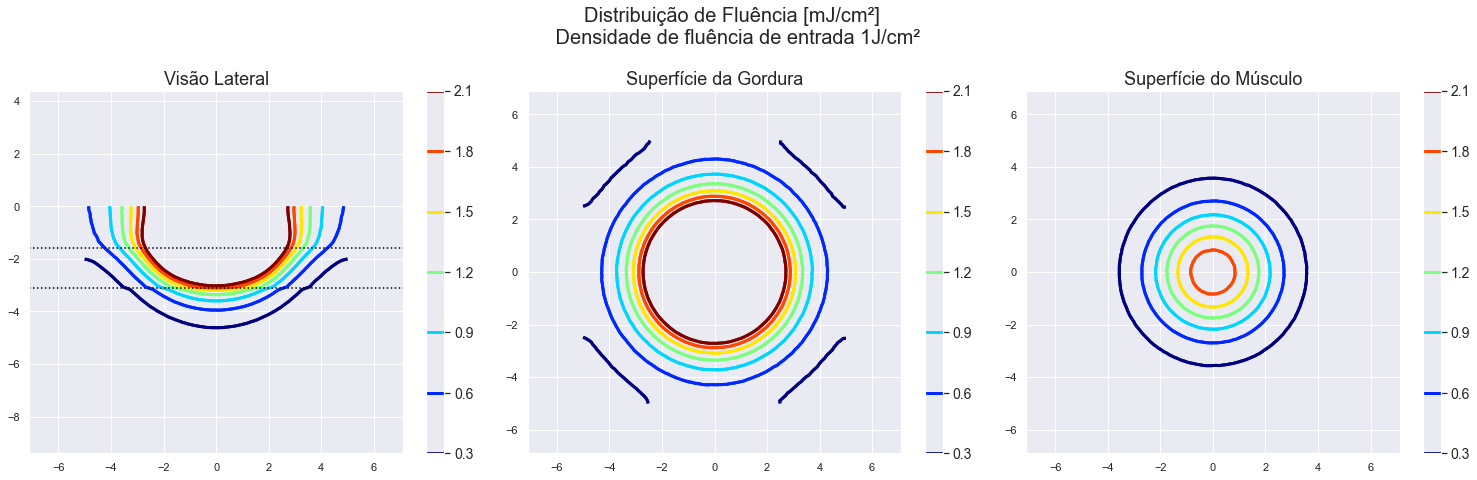

In [12]:
# Perfil 2D

Z = np.linspace(-5,0,50)
X = np.linspace(-5,5,100)


sns.set_theme()
fig,axs = plt.subplots(1,3, figsize = (21, 7))
plt.suptitle('Distribuição de Fluência [mJ/cm²] \n Densidade de fluência de entrada 1J/cm²\n', y=0.95, x=0.49, fontsize = 20)

plt.subplots_adjust(hspace = 0.2)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

axs[0].set_title('Visão Lateral', fontsize=18)
axs[0].contour(X, Z, 1000*data_l_s[:, :]*0.090792, cmap = "jet",levels = ['0.3','0.6','0.9','1.2','1.5','1.8','2.1'],linewidths=3)
axs[0].axis('equal')
img0 = axs[0].contour(X, Z, 1000*data_l_s[:, :]*0.090792, cmap = "jet",levels = ['0.3','0.6','0.9','1.2','1.5','1.8','2.1'],linewidths=3)
fig.colorbar(img0, ax =axs[0])
axs[0].set_xlim([-5, 5])
axs[0].axhline(y = -1.6, color = 'black', linestyle = ':',linewidth=1.5)
axs[0].axhline(y = -3.1, color = 'black', linestyle = ':',linewidth=1.5)

axs[1].set_title('Superfície da Gordura', fontsize=18)
axs[1].contour(X, X, 1000*data_l_s_tg[:, :]*0.090792,levels = ['0.3','0.6','0.9','1.2','1.5','1.8','2.1'], cmap = "jet",linewidths=3)
axs[1].axis('equal')
img1 = axs[1].contour(X, X, 1000*data_l_s_tg[:, :]*0.090792,levels = ['0.3','0.6','0.9','1.2','1.5','1.8','2.1'], cmap = "jet",linewidths=3)
fig.colorbar(img1, ax =axs[1])
axs[1].set_xlim([-5, 5])


axs[2].set_title('Superfície do Músculo', fontsize=18)
axs[2].contour(X, X, 1000*data_l_s_tm[:, :]*0.090792, cmap = "jet",levels = ['0.3','0.6','0.9','1.2','1.5','1.8','2.1'],linewidths=3)
axs[2].axis('equal')
img2 = axs[2].contour(X, X, 1000*data_l_s_tm[:, :]*0.090792, cmap = "jet",levels = ['0.3','0.6','0.9','1.2','1.5','1.8','2.1'],linewidths=3)
fig.colorbar(img2, ax =axs[2])
axs[2].set_xlim([-5, 5])
fig.tight_layout()
levels = ['0','1.5','3.0','4.5','6.0','7.5','9','10.5']

plt.savefig('2D grafico4-perfil-fluencia-layers.jpg', dpi=200)
plt.show()

In [93]:
# Correction l

data1_l = data1_l*0.090792
data2_l = data2_l*0.090792
data3_l = data3_l*0.090792
data4_l = data4_l*0.090792
data5_l = data5_l*0.090792

In [94]:
# Print das intensidades inicial e final

print('1 - Intensidade superfície da pele:', data1_l[49, 50, 50])
print('1 - Intensidade superfície da gordura:', data1_l[34,50,50])
print('1 - Intensidade superfície do músculo:', data1_l[19,50,50])
print('  ')
print('2 - Intensidade superfície da pele:', data2_l[49, 50, 50])
print('2 - Intensidade superfície da gordura:', data2_l[34,50,50])
print('2 - Intensidade superfície do músculo:', data2_l[19,50,50])
print('  ')
print('3 - Intensidade superfície da pele:', data3_l[49, 50, 50])
print('3 - Intensidade superfície da gordura:', data3_l[34,50,50])
print('3 - Intensidade superfície do músculo:', data3_l[19,50,50])
print('  ')
print('4 - Intensidade superfície da pele:', data4_l[49, 50, 50])
print('4 - Intensidade superfície da gordura:', data4_l[34,50,50])
print('4 - Intensidade superfície do músculo:', data4_l[19,50,50])
print('  ')
print('5 - Intensidade superfície da pele:', data5_l[49, 50, 50])
print('5 - Intensidade superfície da gordura:', data5_l[34,50,50])
print('5 - Intensidade superfície do músculo:', data5_l[19,50,50])
print('  ')

1 - Intensidade superfície da pele: 0.017584841087222098
1 - Intensidade superfície da gordura: 0.01224446563231945
1 - Intensidade superfície do músculo: 0.0020207420044541357
  
2 - Intensidade superfície da pele: 0.01759236324584484
2 - Intensidade superfície da gordura: 0.012252235372781754
2 - Intensidade superfície do músculo: 0.001998231674194336
  
3 - Intensidade superfície da pele: 0.017549420649290083
3 - Intensidade superfície da gordura: 0.012278451989650725
3 - Intensidade superfície do músculo: 0.002015636136353016
  
4 - Intensidade superfície da pele: 0.01760102455151081
4 - Intensidade superfície da gordura: 0.012216831169724465
4 - Intensidade superfície do músculo: 0.0020028954801857473
  
5 - Intensidade superfície da pele: 0.017619356430888175
5 - Intensidade superfície da gordura: 0.012256461851835251
5 - Intensidade superfície do músculo: 0.0020127503873705863
  


In [95]:
# Vetor com as intensidades de corte I0/e^2

intensidade_cortel = np.zeros(5)
intensidade_cortel[0]=data1_l[49, 50, 50]*0.1
intensidade_cortel[1]=data2_l[49, 50, 50]*0.1
intensidade_cortel[2]=data3_l[49, 50, 50]*0.1
intensidade_cortel[3]=data4_l[49, 50, 50]*0.1
intensidade_cortel[4]=data5_l[49, 50, 50]*0.1

print('Intensidades de corte', intensidade_cortel)

soma =0
for i in range(5):
    soma = soma + intensidade_cortel[i]
intens_media_corte_l=soma/5

print(intens_media_corte_l)

Intensidades de corte [0.00175848 0.00175924 0.00175494 0.0017601  0.00176194]
0.00175894011929512


In [102]:
# Criação da Máscara

mask1_lg = data1_l[34, :, :] >= intensidade_cortel[0]
mask2_lg = data2_l[34, :, :] >= intensidade_cortel[1]
mask3_lg = data3_l[34, :, :] >= intensidade_cortel[2]
mask4_lg = data4_l[34, :, :] >= intensidade_cortel[3]
mask5_lg = data5_l[34, :, :] >= intensidade_cortel[4]

mask1_lm = data1_l[19, :, :] >= intensidade_cortel[0]
mask2_lm = data2_l[19, :, :] >= intensidade_cortel[1]
mask3_lm = data3_l[19, :, :] >= intensidade_cortel[2]
mask4_lm = data4_l[19, :, :] >= intensidade_cortel[3]
mask5_lm = data5_l[19, :, :] >= intensidade_cortel[4]

mask1_ls = data1_l[49, :, :] >= intensidade_cortel[0]
mask2_ls = data2_l[49, :, :] >= intensidade_cortel[1]
mask3_ls = data3_l[49, :, :] >= intensidade_cortel[2]
mask4_ls = data4_l[49, :, :] >= intensidade_cortel[3]
mask5_ls = data5_l[49, :, :] >= intensidade_cortel[4]


In [103]:
# Cálculo e print da área irradiada na gordura

area1_lg = 0.01*mask1_lg.sum()
print('A área irradiada com pelo menos',intensidade_cortel[0],'J/cm² é',area1_lg,'mm².')
area2_lg = 0.01*mask2_lg.sum()
print('A área irradiada com pelo menos',intensidade_cortel[1],'J/cm² é',area2_lg,'mm².')
area3_lg = 0.01*mask3_lg.sum()
print('A área irradiada com pelo menos',intensidade_cortel[2],'J/cm² é',area3_lg,'mm².')
area4_lg = 0.01*mask4_lg.sum()
print('A área irradiada com pelo menos',intensidade_cortel[3],'J/cm² é',area4_lg,'mm².')
area5_lg = 0.01*mask5_lg.sum()
print('A área irradiada com pelo menos',intensidade_cortel[4],'J/cm² é',area5_lg,'mm².')


A área irradiada com pelo menos 0.0017584841087222099 J/cm² é 26.03 mm².
A área irradiada com pelo menos 0.0017592363245844842 J/cm² é 26.01 mm².
A área irradiada com pelo menos 0.0017549420649290084 J/cm² é 26.11 mm².
A área irradiada com pelo menos 0.001760102455151081 J/cm² é 26.03 mm².
A área irradiada com pelo menos 0.0017619356430888175 J/cm² é 26.03 mm².


In [104]:
# Cálculo e print da área irradiada no músculo

area1_lm = 0.01*mask1_lm.sum()
print('A área irradiada com pelo menos',intensidade_cortel[0],'J/cm² é',area1_lm,'mm².')
area2_lm = 0.01*mask2_lm.sum()
print('A área irradiada com pelo menos',intensidade_cortel[1],'J/cm² é',area2_lm,'mm².')
area3_lm = 0.01*mask3_lm.sum()
print('A área irradiada com pelo menos',intensidade_cortel[2],'J/cm² é',area3_lm,'mm².')
area4_lm = 0.01*mask4_lm.sum()
print('A área irradiada com pelo menos',intensidade_cortel[3],'J/cm² é',area4_lm,'mm².')
area5_lm = 0.01*mask5_lm.sum()
print('A área irradiada com pelo menos',intensidade_cortel[4],'J/cm² é',area5_lm,'mm².')


A área irradiada com pelo menos 0.0017584841087222099 J/cm² é 2.58 mm².
A área irradiada com pelo menos 0.0017592363245844842 J/cm² é 2.6 mm².
A área irradiada com pelo menos 0.0017549420649290084 J/cm² é 2.66 mm².
A área irradiada com pelo menos 0.001760102455151081 J/cm² é 2.64 mm².
A área irradiada com pelo menos 0.0017619356430888175 J/cm² é 2.57 mm².


In [105]:
# Cálculo da fluência média sobre a gordura

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask1_lg[i,j]==1:
            soma = soma + data1_l[34,i,j]
print(soma/mask1_lg.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask2_lg[i,j]==1:
            soma = soma + data2_l[34,i,j]
print(soma/mask2_lg.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask3_lg[i,j]==1:
            soma = soma + data3_l[34,i,j]
print(soma/mask3_lg.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask4_lg[i,j]==1:
            soma = soma + data4_l[34,i,j]
print(soma/mask4_lg.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask5_lg[i,j]==1:
            soma = soma + data5_l[34,i,j]
print(soma/mask5_lg.sum(), 'J/cm²')

0.0055302843784788445 J/cm²
0.0055341923136195455 J/cm²
0.005519610478236574 J/cm²
0.005530889983328828 J/cm²
0.005530914674322255 J/cm²


In [106]:
# Cálculo da fluência média sobre o músculo

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask1_lm[i,j]==1:
            soma = soma + data1_l[19,i,j]
print(soma/mask1_lm.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask2_lm[i,j]==1:
            soma = soma + data2_l[19,i,j]
print(soma/mask2_lm.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask3_lm[i,j]==1:
            soma = soma + data3_l[19,i,j]
print(soma/mask3_lm.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask4_lm[i,j]==1:
            soma = soma + data4_l[19,i,j]
print(soma/mask4_lm.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask5_lm[i,j]==1:
            soma = soma + data5_l[19,i,j]
print(soma/mask5_lm.sum(), 'J/cm²')

0.0018886675859370896 J/cm²
0.0018871283734045925 J/cm²
0.001885567757109055 J/cm²
0.0018864748777240848 J/cm²
0.001889708488724634 J/cm²


In [107]:
# Cálculo da fluência média sobre a pele

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask1_ls[i,j]==1:
            soma = soma + data1_l[49,i,j]
print(soma/mask1_ls.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask2_ls[i,j]==1:
            soma = soma + data2_l[49,i,j]
print(soma/mask2_ls.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask3_ls[i,j]==1:
            soma = soma + data3_l[49,i,j]
print(soma/mask3_ls.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask4_ls[i,j]==1:
            soma = soma + data4_l[49,i,j]
print(soma/mask4_ls.sum(), 'J/cm²')

soma = 0
for i in range(0,100):
    for j in range(0,100):
        if mask5_ls[i,j]==1:
            soma = soma + data5_l[49,i,j]
print(soma/mask5_ls.sum(), 'J/cm²')

0.007134150654155308 J/cm²
0.007132420116488503 J/cm²
0.007125372993043218 J/cm²
0.007141981320187386 J/cm²
0.007158669578449445 J/cm²
